<a href="https://colab.research.google.com/github/MartinSantaGitHub/curso-series-temporales/blob/master/13.%20Redes%20Neuronales/Python/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras 

In [46]:
# Importando librarías
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Regresión lineal y=mx+b+ruido

In [47]:
m = 2
b = 3
x = np.linspace(0,50,100)

# vamos a fijar una semilla en 101, un valor aleatorio para asegurarnos de que obtengas los mismos resultados que yo!
np.random.seed(101) 
ruido = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [48]:
y = m*x + b + ruido

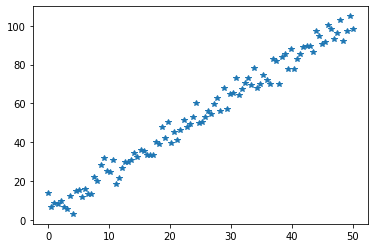

In [49]:
plt.plot(x,y,'*');

## Creando una Red Neuronal para una Regresión

In [50]:
from keras.models import Sequential
from keras.layers import Dense

In [51]:
model = Sequential()
# 4 Neuronas, esperamos solo 1 input 
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neuronas
model.add(Dense(4, activation='relu'))
# Solo 1 neurona porque solo tenemos 1 output que es Y
model.add(Dense(1, activation='linear'))
# Compilamos todas las capas
model.compile(loss='mse', optimizer='adam')

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento de la red

** NOTA: EN ESTE EJEMPLO VAMOS A SALTARNOS EL PASO DE DIVIDIR LOS DATOS EN ENTRENAMIENTO Y PRUEBA!!!! **

In [53]:
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 3779.9792
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 3454.5896
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 3595.6785
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 3734.1305
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 3693.2687
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 3677.9462
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 3750.5069
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 3717.2221
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 3614.2581
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 3733.8000
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 3592.9030
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 3641.0649
Epoch 13/200
4/4 [=======

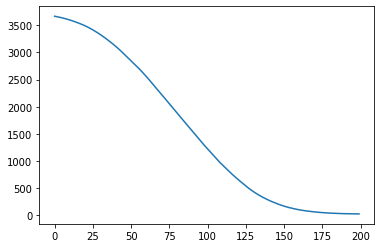

In [54]:
loss=model.history.history['loss']
epochs=range(len(loss))
plt.plot(epochs,loss)

## Prediciendo nuevos puntos con el modelo creado


In [55]:
x_for_predictions = np.linspace(0,50,1000)

In [56]:
y_predicted = model.predict(x_for_predictions)

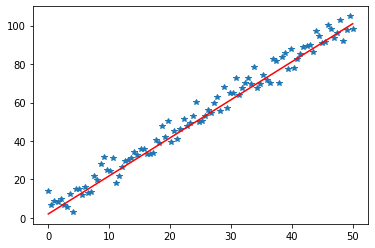

In [57]:
# X e Y originales
plt.plot(x,y,'*')
# Línea de predicción
plt.plot(x_for_predictions,y_predicted,'r');

# Evaluando el error

In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [59]:
# Predicciones
prediction_for_true_y = model.predict(x)

In [63]:
mean_squared_error(y,prediction_for_true_y)

21.377735056726223

In [61]:
mean_absolute_error(y,prediction_for_true_y)

3.72609852246454